# Aula 10 - Clusterização

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução a Clusterização
- 2) K-Means
- 3) Redução de Dimensionalidade
- 4) DBScan
- 5) Exercícios

<img src="https://miro.medium.com/max/724/0*ipBIcsy9jjvqEpbK.png" width=800>

##   

## Exercícios

**1)** Usando o dataset do *Insurance.csv*, ao inves de definirmos as classes, mas tentar descobrir quais os melhores agrupamentos utilizando o KNN e o DBScan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [38]:
df = pd.read_csv('./datasets/Insurance.csv')

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
X = df.drop(['sex', 'smoker'], axis = 1)

In [41]:
X_with_dummies = pd.get_dummies(X, prefix_sep='_', columns=['region'])

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
std = StandardScaler()

In [45]:
X_std = std.fit_transform(X_with_dummies)

In [46]:
def calculate_wcss(data):
    wcss = []
    
    for n in range(2, 21):
        model = KMeans(n_clusters=n, random_state=42)
        model.fit(X=data)
        wcss.append(model.inertia_)
        
    return wcss  

In [47]:
wcss = calculate_wcss(X_std)
wcss

[8779.601441845582,
 7000.217293114326,
 5231.582063314244,
 4775.558594340417,
 4485.9686607114745,
 4204.756468641775,
 3925.7218780167777,
 3674.2562344862863,
 3483.436631792895,
 3242.0821932541226,
 3071.2446122110277,
 2891.638229466484,
 2721.6915381965787,
 2581.342783623894,
 2436.6280670663705,
 2319.755836190405,
 2232.7001751578414,
 2175.6630740930314,
 2113.3273257438836]

In [48]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [49]:
best_k = optimal_number_of_clusters(wcss)
best_k

5

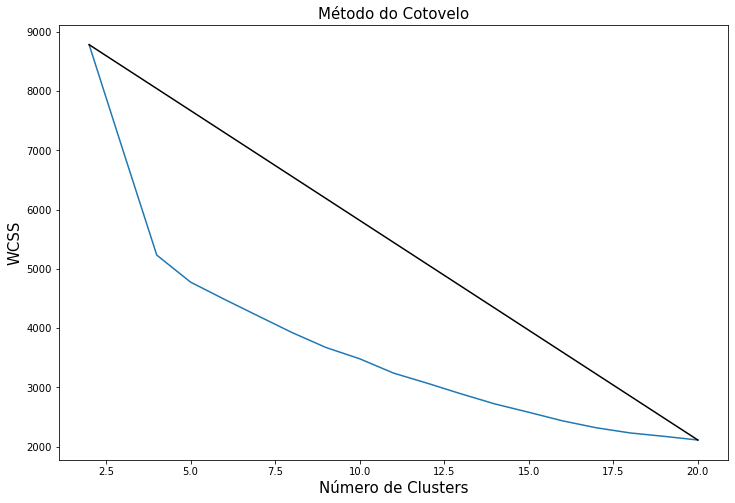

In [50]:
plt.figure(figsize=(12,8))
plt.plot(range(2, 21), wcss)
plt.plot([2,20],[wcss[0],wcss[18]],'k-')
plt.title('Método do Cotovelo', fontsize = 15)
plt.xlabel('Número de Clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

In [51]:
model = KMeans(n_clusters = best_k, random_state = 42)

In [52]:
model.fit(X_std)

KMeans(n_clusters=5, random_state=42)

In [53]:
clusters = model.predict(X_std)
clusters

array([1, 3, 3, ..., 3, 1, 2])

In [54]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X_std)

In [61]:
X_pca

array([[-0.72552558, -1.52665565],
       [ 0.84030133, -0.3717534 ],
       [ 1.11009592, -0.29653459],
       ...,
       [ 1.07086631, -0.36328362],
       [-1.33674089, -1.7316098 ],
       [ 0.0170119 ,  0.229468  ]])

In [62]:
df_PCA = pd.DataFrame(X_pca, columns = ['x_PCA', 'y_PCA'])

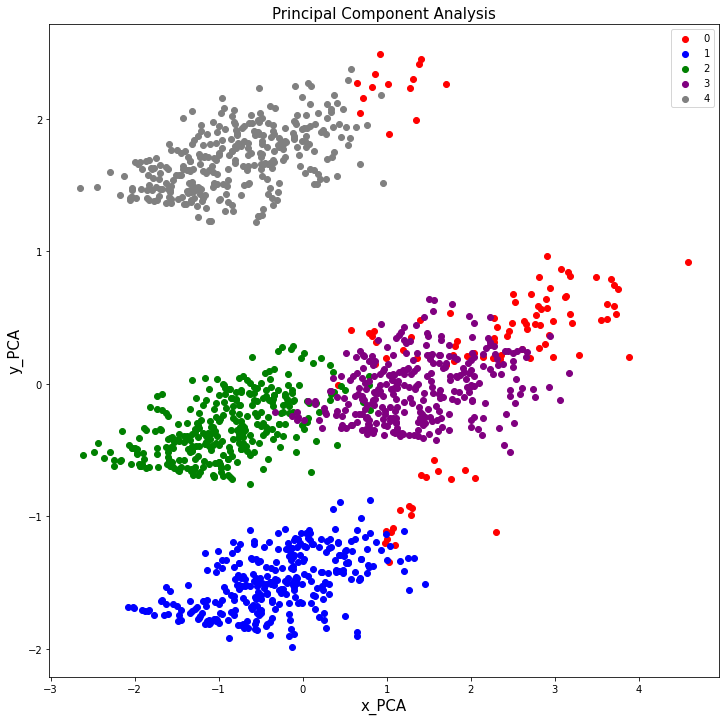

In [63]:
class_labels = np.unique(clusters)

colors = ['red', 'blue', 'green', 'purple', 'gray']
aux = 0
plt.figure(figsize=(12,12))
for c in class_labels:
    ind = np.where(clusters == c)
    plt.scatter(df_PCA['x_PCA'].iloc[ind], df_PCA['y_PCA'].iloc[ind], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('x_PCA', fontsize=15)
plt.ylabel('y_PCA', fontsize=15)
plt.title('Principal Component Analysis', fontsize=15)
plt.legend()
plt.show()

In [59]:
from sklearn.cluster import DBSCAN

In [64]:
db = DBSCAN(eps = 2.5, min_samples = 5).fit(X_std)

In [65]:
labels_db = db.labels_
labels_db

array([0, 1, 1, ..., 1, 0, 2], dtype=int64)

In [66]:
# Calculando o numero de clusters e numero de pontos considerados ruídos
n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_ = list(labels_db).count(-1)

In [67]:
print('Estimativa de clusters: %d' % n_clusters_)
print('Estimativa de pontos de ruído: %d' % n_noise_)

Estimativa de clusters: 4
Estimativa de pontos de ruído: 0


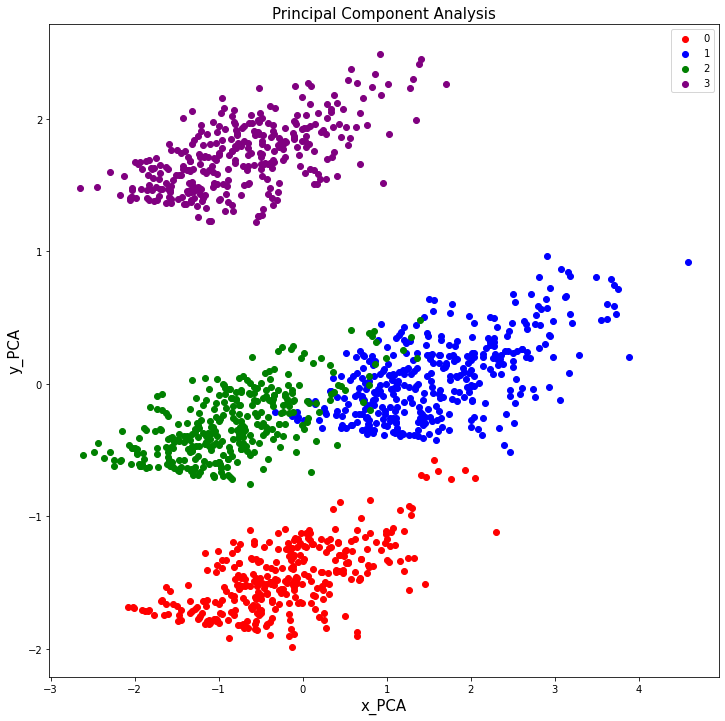

In [68]:
class_labels_db = np.unique(labels_db)
colors = ['red', 'blue', 'green', 'purple']
aux = 0

plt.figure(figsize=(12,12))
for c in class_labels_db:
    ind = np.where(labels_db == c)
    plt.scatter(df_PCA['x_PCA'].iloc[ind], df_PCA['y_PCA'].iloc[ind], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('x_PCA', fontsize=15)
plt.ylabel('y_PCA', fontsize=15)
plt.title('Principal Component Analysis', fontsize=15)
plt.legend()
plt.show()

## 

**2)** Usando o arquivo `wine-clustering.csv`, faça agrupamentos utilizando as técnicas aprendidas na aula de hoje e identifique quais delas se aplica melhor a base de dados

In [74]:
wine = pd.read_csv('./datasets/wine-clustering.csv')

In [75]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [113]:
wine.shape

(178, 13)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
std = StandardScaler()

In [78]:
X_std = std.fit_transform(wine)

In [79]:
def calculate_wcss(data):
    wcss = []
    
    for n in range(2, 21):
        model = KMeans(n_clusters=n, random_state=42)
        model.fit(X=data)
        wcss.append(model.inertia_)
        
    return wcss  

In [80]:
wcss = calculate_wcss(X_std)
wcss

[1659.0079672511504,
 1277.928488844643,
 1175.7051928197127,
 1104.861683962532,
 1042.3872037251417,
 988.0533283180057,
 940.708165089653,
 902.0783170433883,
 866.7991687164842,
 816.9778775673813,
 802.8796543612843,
 774.0552605734554,
 743.0009216093142,
 719.877886405656,
 699.0658373802539,
 672.8550974711954,
 666.2655476172198,
 657.8188034592264,
 623.9496613198589]

In [81]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [82]:
best_k = optimal_number_of_clusters(wcss)
best_k

6

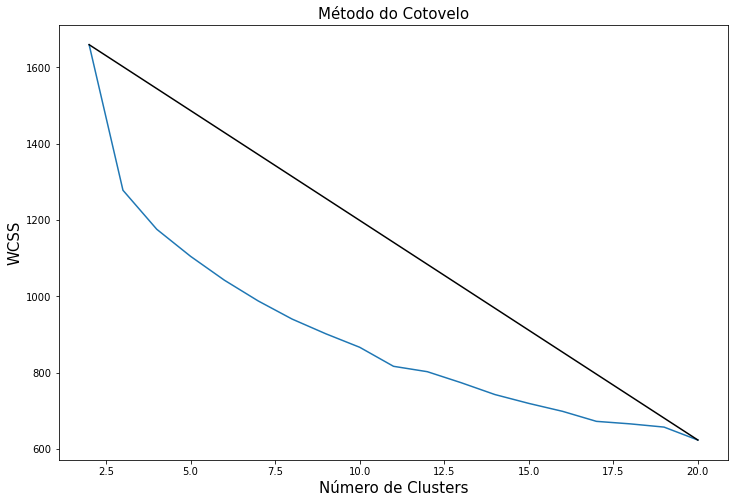

In [83]:
plt.figure(figsize=(12,8))
plt.plot(range(2, 21), wcss)
plt.plot([2,20],[wcss[0],wcss[18]],'k-')
plt.title('Método do Cotovelo', fontsize = 15)
plt.xlabel('Número de Clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

In [84]:
model = KMeans(n_clusters = best_k, random_state = 42)

In [85]:
model.fit(X_std)

KMeans(n_clusters=6, random_state=42)

In [86]:
clusters = model.predict(X_std)
clusters

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 5, 3, 3, 1, 3,
       3, 3, 1, 3, 1, 2, 3, 2, 3, 3, 3, 1, 3, 2, 3, 3, 1, 5, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 1, 3, 2,
       2, 3, 1, 1, 1, 1, 3, 3, 5, 3, 2, 2, 2, 2, 2, 3, 3, 1, 1, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4,
       5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 4,
       4, 4])

In [87]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X_std)

In [89]:
X_pca

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [90]:
df_PCA = pd.DataFrame(X_pca, columns = ['x_PCA', 'y_PCA'])

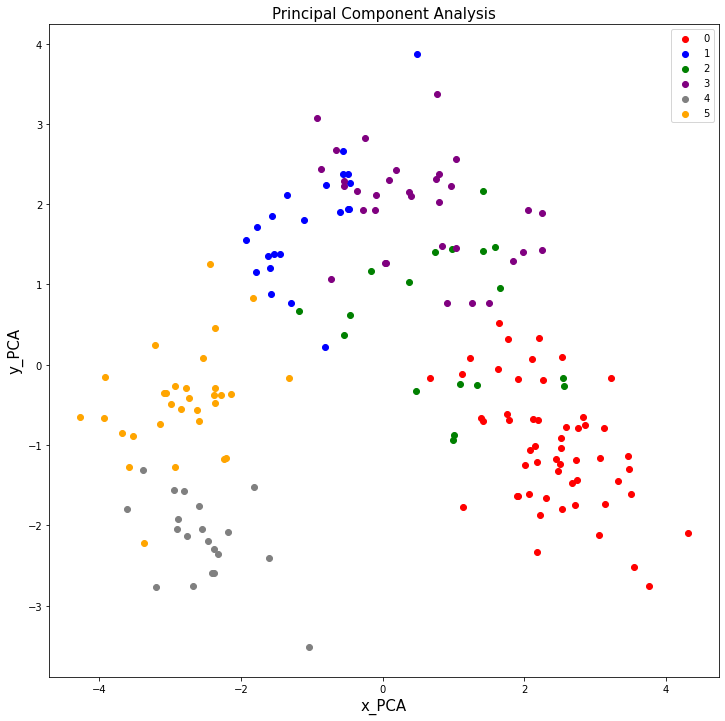

In [92]:
class_labels = np.unique(clusters)

colors = ['red', 'blue', 'green', 'purple', 'gray', 'orange']
aux = 0
plt.figure(figsize=(12,12))
for c in class_labels:
    ind = np.where(clusters == c)
    plt.scatter(df_PCA['x_PCA'].iloc[ind], df_PCA['y_PCA'].iloc[ind], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('x_PCA', fontsize=15)
plt.ylabel('y_PCA', fontsize=15)
plt.title('Principal Component Analysis', fontsize=15)
plt.legend()
plt.show()

In [93]:
from sklearn.cluster import DBSCAN

In [122]:
db = DBSCAN(eps = 3, min_samples = 14).fit(X_std)

In [123]:
labels_db = db.labels_
labels_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [124]:
# Calculando o numero de clusters e numero de pontos considerados ruídos
n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_ = list(labels_db).count(-1)

In [125]:
print('Estimativa de clusters: %d' % n_clusters_)
print('Estimativa de pontos de ruído: %d' % n_noise_)

Estimativa de clusters: 1
Estimativa de pontos de ruído: 13


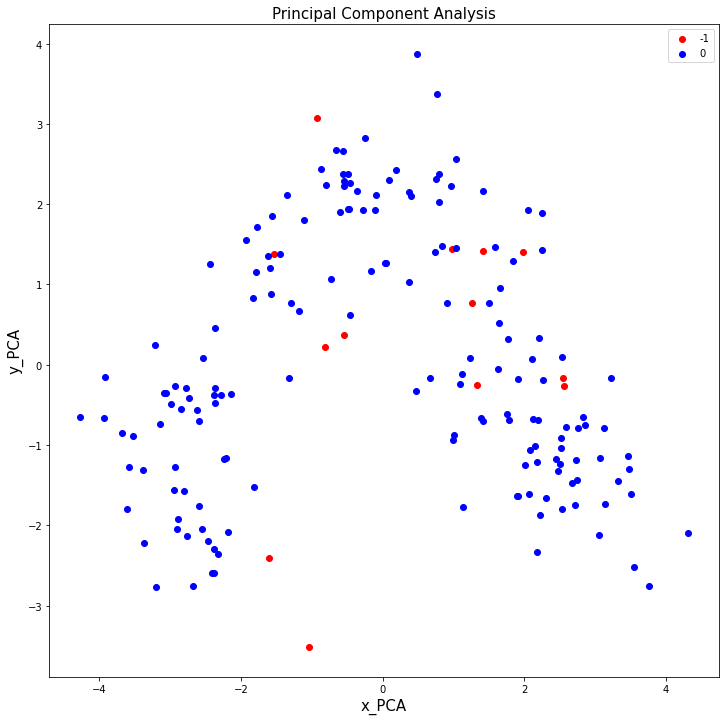

In [126]:
class_labels_db = np.unique(labels_db)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'gray']
aux = 0

plt.figure(figsize=(12,12))
for c in class_labels_db:
    ind = np.where(labels_db == c)
    plt.scatter(df_PCA['x_PCA'].iloc[ind], df_PCA['y_PCA'].iloc[ind], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('x_PCA', fontsize=15)
plt.ylabel('y_PCA', fontsize=15)
plt.title('Principal Component Analysis', fontsize=15)
plt.legend()
plt.show()

##  